In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
suicide = pd.read_csv('C:/Users/tejru/Downloads/master.csv')

In [3]:
suicide.shape

(27820, 12)

In [4]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
suicide.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

# Dividing the data into 3 categories for future reference

In [6]:
CONTINUOUS = ['suicides/100k pop','HDI for year','gdp_per_capita ($)']
CATEGORICALS = []
TO_DELETE = []

# Suicide rate distribution curve

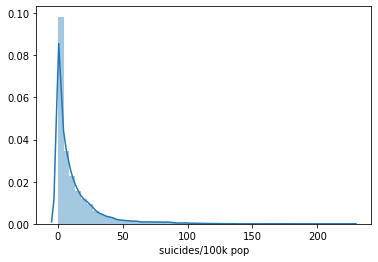

In [7]:
plt.figure()
sns.distplot(suicide['suicides/100k pop'])
plt.show()

In [8]:
low = np.quantile(suicide['suicides/100k pop'], .01)
high = np.quantile(suicide['suicides/100k pop'], .99)
print(low, high)

suicide['suicides/100k pop'] = suicide['suicides/100k pop'].apply(lambda x: x if x <= high and x >= low else np.NaN)
print(suicide.shape)
suicide.dropna(subset=['suicides/100k pop'], inplace=True)
print(suicide.shape)

0.0 91.57100000000013
(27820, 12)
(27541, 12)


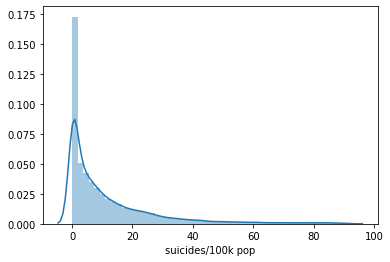

In [9]:
plt.figure()
sns.distplot(suicide['suicides/100k pop'])
plt.show()

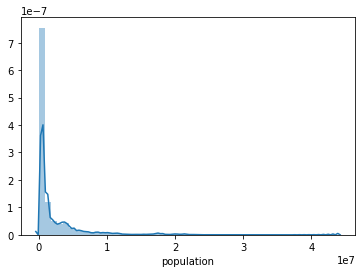

In [10]:
plt.figure()
sns.distplot(suicide['population'])
plt.show()

# Plotting the countries in ascending order according to their suicide count 

Country number of unique values: 101


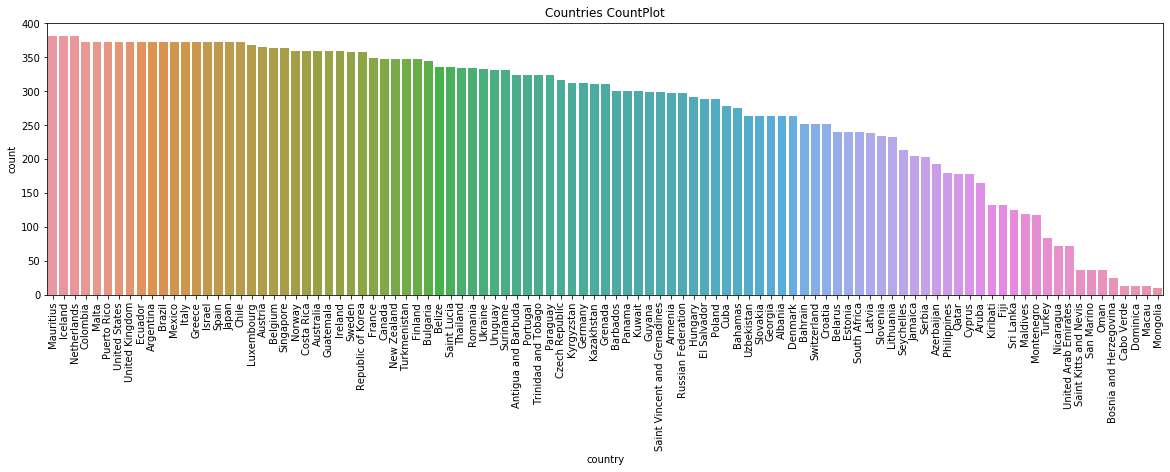

In [11]:
print(f"Country number of unique values: {suicide['country'].nunique()}")

plt.figure(figsize=(20, 5))
sns.countplot(suicide['country'], order=suicide['country'].value_counts().index)
plt.title("Countries CountPlot")
plt.xticks(rotation=90)
plt.show()

In [12]:
print("Top 30 suicides countries")
top_suicides_countries = list(suicide.groupby(['country']).mean()['suicides/100k pop'].sort_values(ascending=False)[:30].index)
print(top_suicides_countries)

print("Bottom 30 sucides countries")
bottom_suicides_countries = list(suicide.groupby(['country']).mean()['suicides/100k pop'].sort_values(ascending=True)[:30].index)
print(bottom_suicides_countries)

Top 30 suicides countries
['Sri Lanka', 'Lithuania', 'Kazakhstan', 'Russian Federation', 'Belarus', 'Ukraine', 'Hungary', 'Latvia', 'Estonia', 'Finland', 'Guyana', 'Slovenia', 'Japan', 'Republic of Korea', 'Suriname', 'Austria', 'Belgium', 'Croatia', 'Switzerland', 'France', 'Uruguay', 'Mongolia', 'Cuba', 'Czech Republic', 'Serbia', 'Luxembourg', 'Germany', 'Bulgaria', 'Poland', 'Singapore']
Bottom 30 sucides countries
['Saint Kitts and Nevis', 'Dominica', 'Maldives', 'Jamaica', 'Antigua and Barbuda', 'Oman', 'South Africa', 'Kuwait', 'Bahamas', 'United Arab Emirates', 'Qatar', 'Bahrain', 'Azerbaijan', 'Grenada', 'Turkey', 'Philippines', 'Barbados', 'Guatemala', 'Armenia', 'Cyprus', 'Albania', 'San Marino', 'Greece', 'Paraguay', 'Georgia', 'Bosnia and Herzegovina', 'Mexico', 'Malta', 'Fiji', 'Saint Vincent and Grenadines']


# Plot of both top and least suicide countries

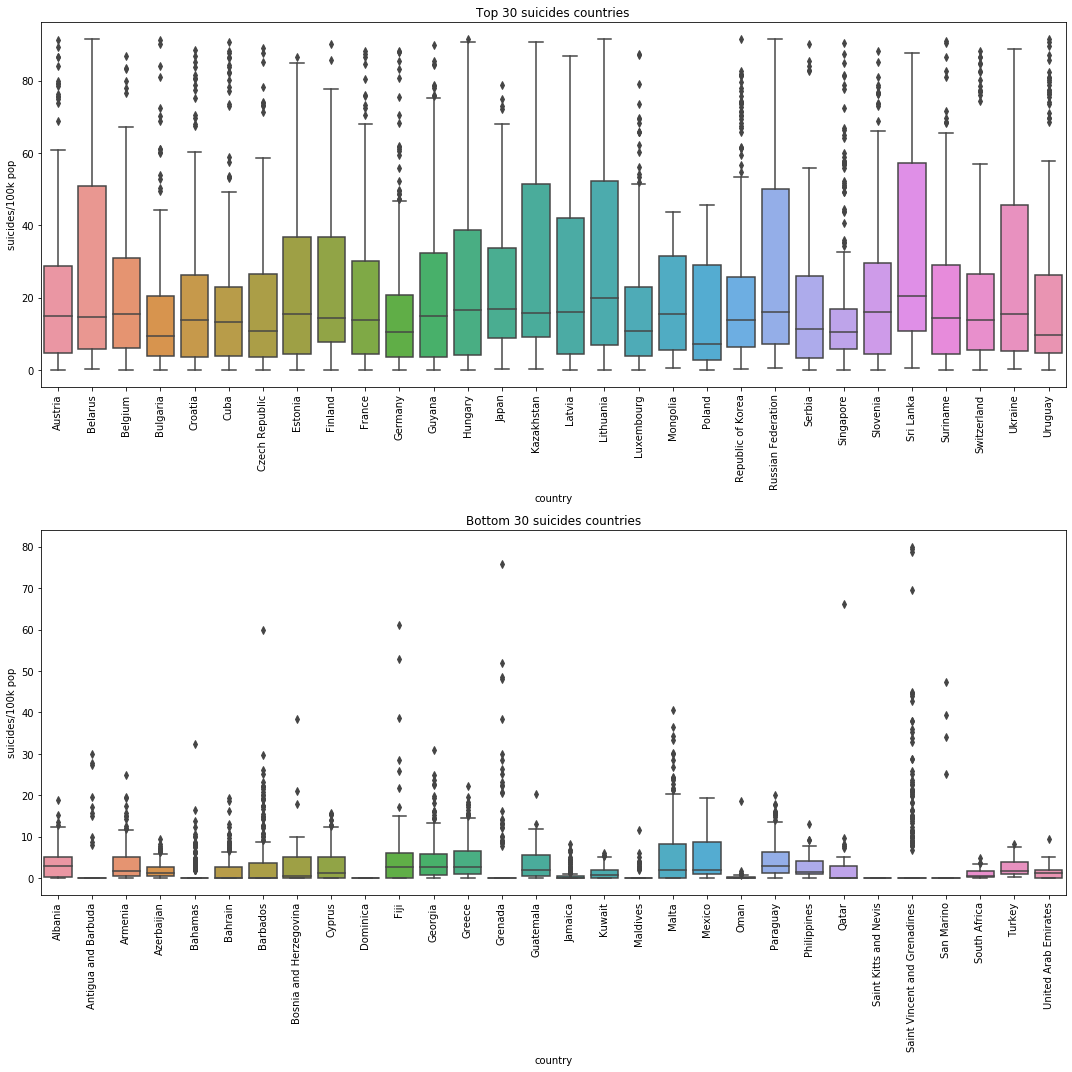

In [13]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.boxplot(x='country', y='suicides/100k pop', 
            data=suicide.loc[suicide['country'].isin(top_suicides_countries)], ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Top 30 suicides countries')
sns.boxplot(x='country', y='suicides/100k pop', 
            data=suicide.loc[suicide['country'].isin(bottom_suicides_countries)], ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Bottom 30 suicides countries')
plt.tight_layout()
plt.show()


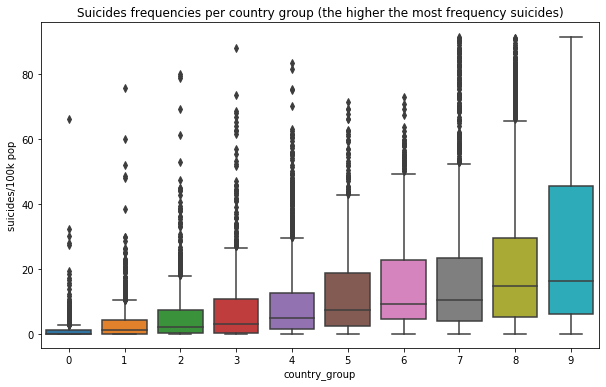

In [14]:
temp = pd.qcut(x=suicide.groupby(['country']).mean()['suicides/100k pop'].sort_values(ascending=False), 
               q=10, labels=range(10))
suicide['country_group'] = suicide['country'].map(temp)
suicide['country_group'] = pd.to_numeric(suicide['country_group'])

plt.figure(figsize=(10,6))
sns.boxplot(x=suicide['country_group'], y=suicide['suicides/100k pop'])
plt.title("Suicides frequencies per country group (the higher the most frequency suicides)")
plt.show()

In [15]:
suicide['country_group']

0        1
1        1
2        1
3        1
4        1
        ..
27815    4
27816    4
27817    4
27818    4
27819    4
Name: country_group, Length: 27541, dtype: int64

###  Removing the country column as we generated a new column on base of country

In [16]:
CATEGORICALS.append('country_group')
TO_DELETE.append('country')

# Average suicide rate for all years 

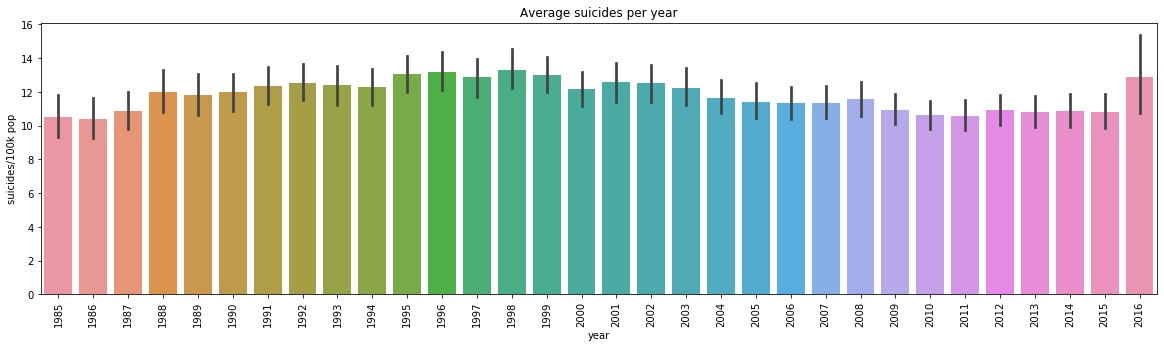

In [17]:
plt.figure(figsize=(20, 5))
sns.barplot(suicide['year'], suicide['suicides/100k pop'])
plt.title("Average suicides per year")
plt.xticks(rotation=90)
plt.show()

In [18]:
suicide = suicide.loc[suicide['year']!=2016]


# Trend of suicide number & suicide population over all the years 

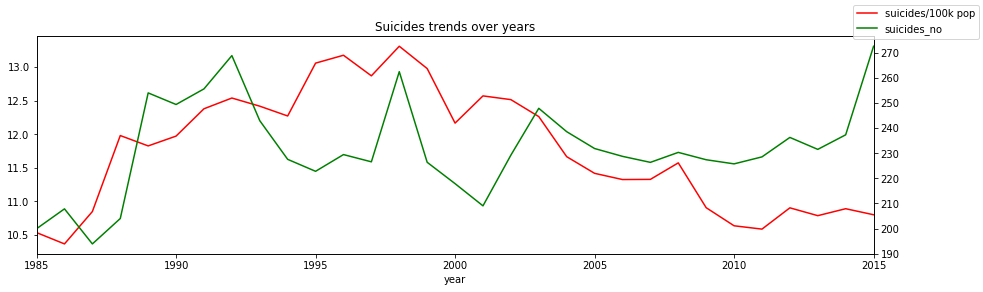

In [19]:
temp = suicide.groupby(['year']).mean()[['suicides/100k pop','suicides_no']]

fig, ax1 = plt.subplots(figsize=(15,4))
temp['suicides/100k pop'].plot(c='r', ax=ax1)
ax2 = ax1.twinx()
temp['suicides_no'].plot(c='g', ax=ax2)
ax1.figure.legend()
ax1.set_title("Suicides trends over years")
plt.show()

# Distribution of suicide rate for every 10 years

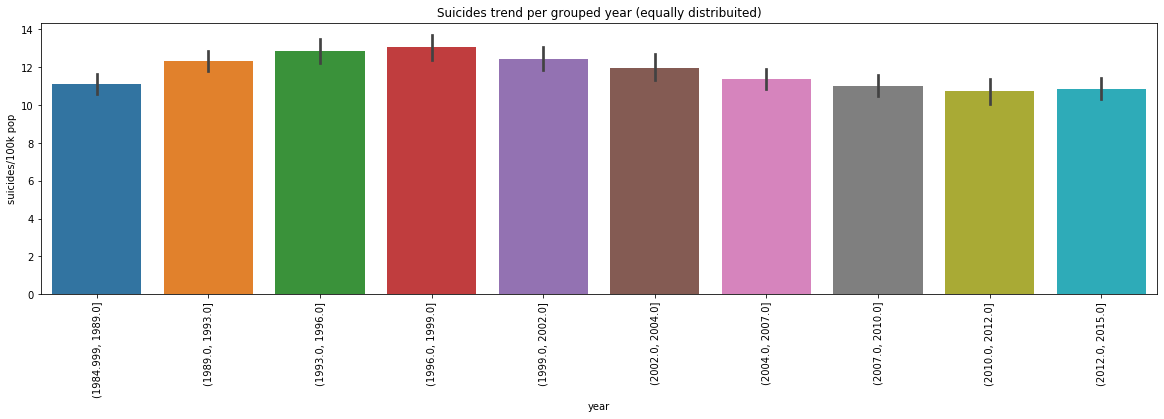

In [20]:
plt.figure(figsize=(20, 5))
sns.barplot(pd.Series(pd.qcut(suicide['year'],10), name='year'), suicide['suicides/100k pop'])
plt.title("Suicides trend per grouped year (equally distribuited)")
plt.xticks(rotation=90)
plt.show()

In [21]:
suicide['year_range'] = pd.qcut(suicide['year'],10)

In [22]:
suicide['year_range']

0        (1984.999, 1989.0]
1        (1984.999, 1989.0]
2        (1984.999, 1989.0]
3        (1984.999, 1989.0]
4        (1984.999, 1989.0]
                ...        
27815      (2012.0, 2015.0]
27816      (2012.0, 2015.0]
27817      (2012.0, 2015.0]
27818      (2012.0, 2015.0]
27819      (2012.0, 2015.0]
Name: year_range, Length: 27382, dtype: category
Categories (10, interval[float64]): [(1984.999, 1989.0] < (1989.0, 1993.0] < (1993.0, 1996.0] < (1996.0, 1999.0] ... (2004.0, 2007.0] < (2007.0, 2010.0] < (2010.0, 2012.0] < (2012.0, 2015.0]]

# Removing the year column as we generated a new column year_range

In [23]:
CATEGORICALS.append('year_range')
TO_DELETE.append('year')

# Suicides distribution per sex

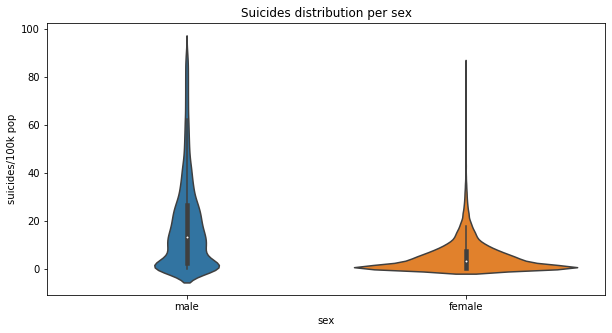

In [24]:
plt.figure(figsize=(10,5))
sns.violinplot(x='sex', y='suicides/100k pop', data=suicide)
plt.title("Suicides distribution per sex")
plt.show()

In [25]:
CATEGORICALS.append('sex')

In [26]:
print(f"Age number of unique values: {suicide['age'].nunique()}")
print(suicide['age'].value_counts())

display(suicide.groupby(['age']).agg(['sum','mean'])[['suicides_no','suicides/100k pop']])

Age number of unique values: 6
5-14 years     4610
15-24 years    4610
25-34 years    4609
55-74 years    4578
35-54 years    4572
75+ years      4403
Name: age, dtype: int64


suicides_no             suicides/100k pop           
                    sum        mean               sum       mean
age                                                             
15-24 years      807347  175.129501          41292.61   8.957182
25-34 years     1111532  241.165546          56145.42  12.181692
35-54 years     2240793  490.112205          64796.90  14.172550
5-14 years        52264   11.337093           2858.39   0.620041
55-74 years     1560912  340.959371          71207.45  15.554270
75+ years        586775  133.267091          86488.79  19.643150

# plot between the categories of ages and suicide number, suicide population

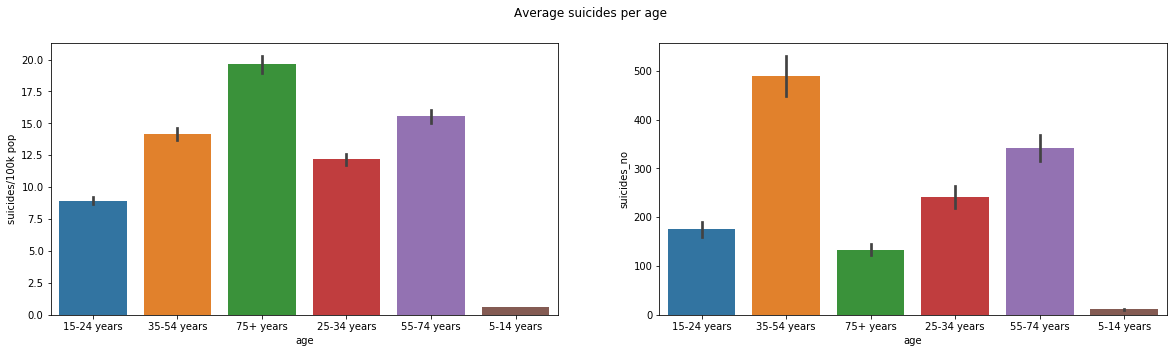

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(suicide['age'], suicide['suicides/100k pop'], orient='v', ax=ax[0])
sns.barplot(suicide['age'], suicide['suicides_no'], orient='v', ax=ax[1])
fig.suptitle("Average suicides per age")
plt.show()

# Suicide distribution of all ages

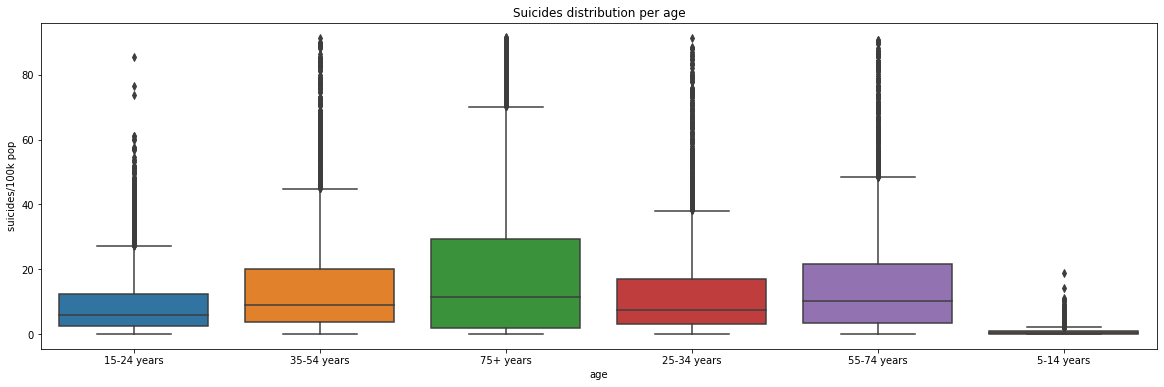

In [28]:
plt.figure(figsize=(20,6))
sns.boxplot(suicide['age'], suicide['suicides/100k pop'])
plt.title("Suicides distribution per age")
plt.show()

In [29]:
CATEGORICALS.append('age')

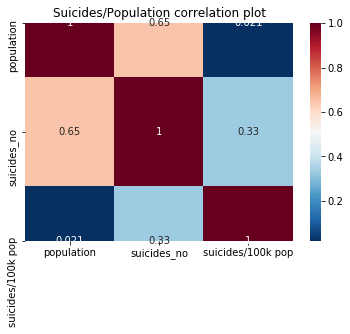

In [30]:
plt.figure()
sns.heatmap(suicide[['population','suicides_no','suicides/100k pop']].corr(), annot=True, cmap='RdBu_r')
plt.title("Suicides/Population correlation plot")
plt.show()

In [31]:
CATEGORICALS

['country_group', 'year_range', 'sex', 'age']

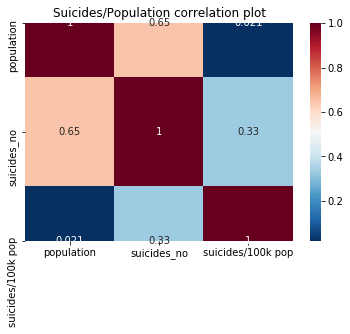

In [32]:
plt.figure()
sns.heatmap(suicide[['population','suicides_no','suicides/100k pop']].corr(), annot=True, cmap='RdBu_r')
plt.title("Suicides/Population correlation plot")
plt.show()

# Plot the distribution of Human development index (HDI)

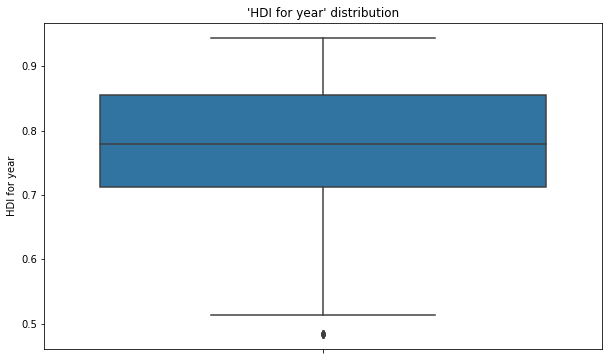

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(suicide['HDI for year'], orient='v')
plt.title("'HDI for year' distribution")
plt.show()

In [34]:
suicide['HDI for year'].fillna((suicide['HDI for year'].mean()), inplace=True)

In [35]:
suicide['HDI for year'].isna().sum()

0

In [36]:
CONTINUOUS.append(' gdp_for_year ($) ')

In [38]:
suicide['country_group']

0        1
1        1
2        1
3        1
4        1
        ..
27815    4
27816    4
27817    4
27818    4
27819    4
Name: country_group, Length: 27382, dtype: int64

# GPD per year by country group trends

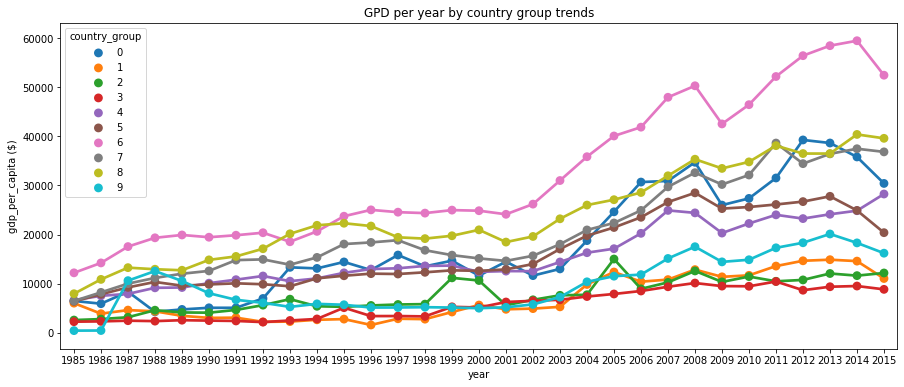

In [39]:
plt.figure(figsize=(15,6))
sns.pointplot(x='year', y='gdp_per_capita ($)', hue='country_group', 
              data = suicide.groupby(['country_group','year']).mean().reset_index())
plt.title("GPD per year by country group trends")
plt.show()

In [34]:
suicide[' gdp_for_year ($) '].isna().sum()

0

# Plot of both the genders between the gdp_year and gdp_percapita income

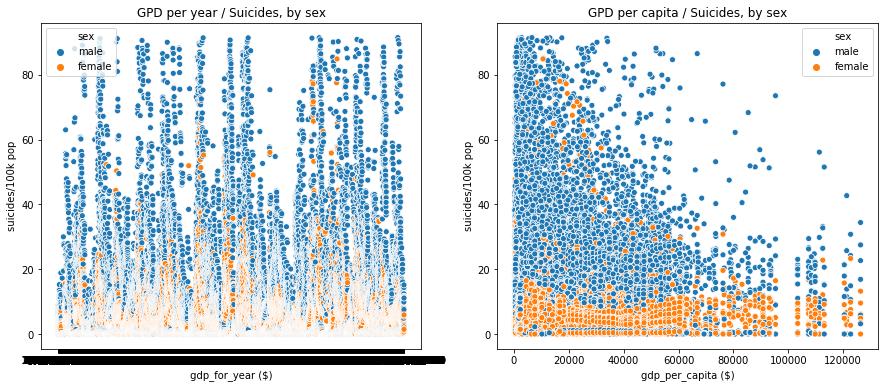

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(suicide[' gdp_for_year ($) '], suicide['suicides/100k pop'], hue=suicide['sex'], ax=ax[0])
ax[0].set_title("GPD per year / Suicides, by sex")
sns.scatterplot(suicide['gdp_per_capita ($)'], suicide['suicides/100k pop'], hue=suicide['sex'], ax=ax[1])
ax[1].set_title("GPD per capita / Suicides, by sex")
plt.show()

In [40]:
print(f"Generation number of unique values: {suicide['generation'].nunique()}")
print(suicide['generation'].value_counts())


Generation number of unique values: 6
Generation X       6375
Silent             6228
Millenials         5780
Boomers            4921
G.I. Generation    2608
Generation Z       1470
Name: generation, dtype: int64


# Plot of suicide rate based on 5 categories of generations 

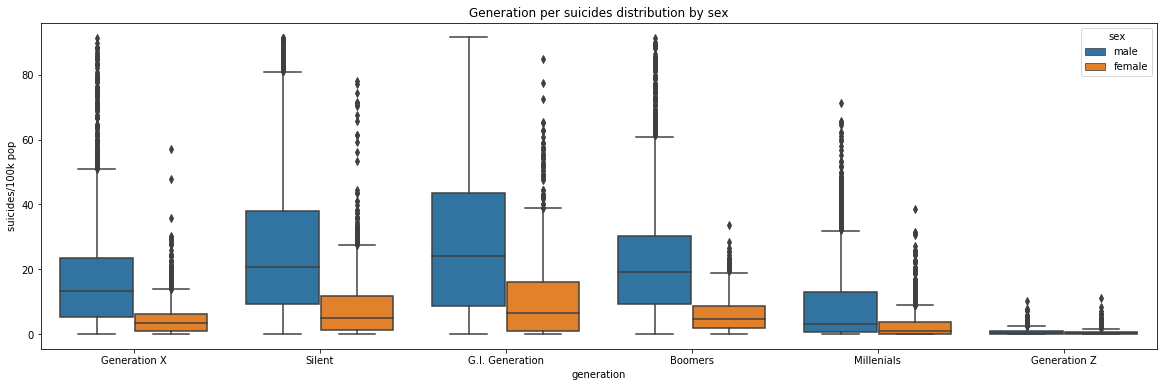

In [41]:
plt.figure(figsize=(20,6))
sns.boxplot(suicide['generation'], suicide['suicides/100k pop'], hue=suicide['sex'])
plt.title("Generation per suicides distribution by sex")
plt.show()


In [37]:
CATEGORICALS.append('generation')

In [42]:
CONTINUOUS

['suicides/100k pop',
 'HDI for year',
 'gdp_per_capita ($)',
 ' gdp_for_year ($) ']

# Removing the skewness in the coutinous variable 

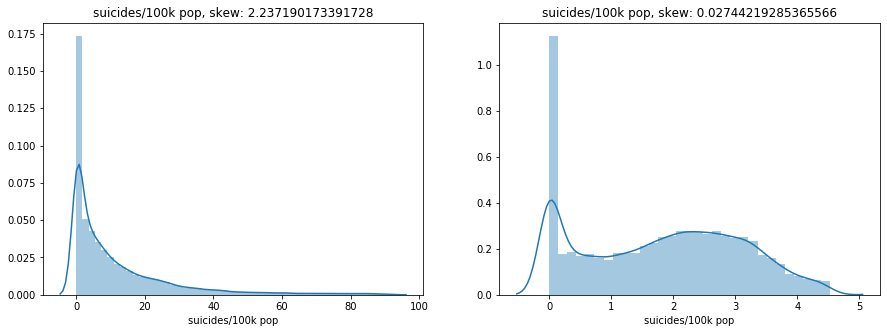

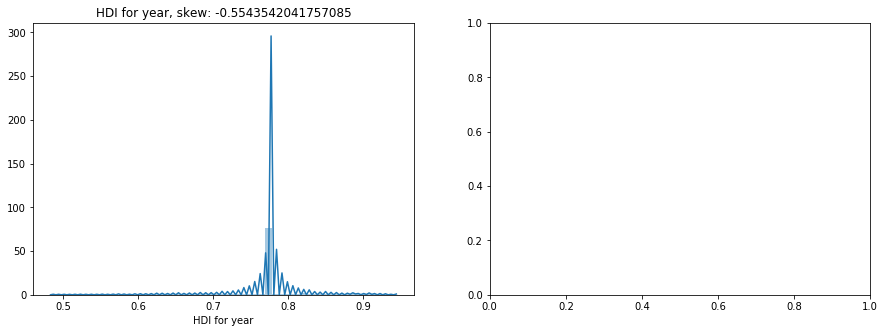

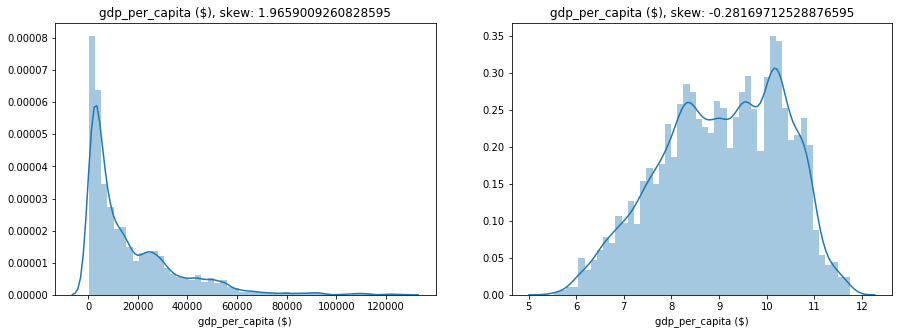

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [43]:
from scipy.stats import skew

for c in CONTINUOUS:
    skew_value = skew(suicide[c].dropna())
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(suicide[c], ax=ax[0])
    ax[0].set_title(f'{c}, skew: {skew_value}')
    if abs(skew_value) >= 0.6:
        new_skew_value = skew(np.log1p(suicide[c]).dropna())
        new_serie = np.log1p(suicide[c])
        sns.distplot(new_serie, ax=ax[1])
        ax[1].set_title(f'{c}, skew: {new_skew_value}')
        suicide[c] = new_serie
    plt.show()

# Implementation of above graphs after removing the outiers of dataset

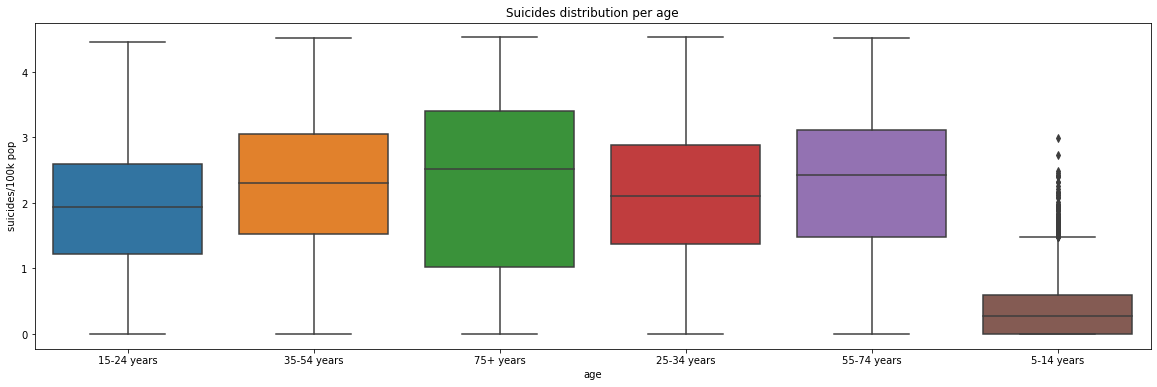

In [40]:
plt.figure(figsize=(20,6))
sns.boxplot(suicide['age'], suicide['suicides/100k pop'])
plt.title("Suicides distribution per age")
plt.show()

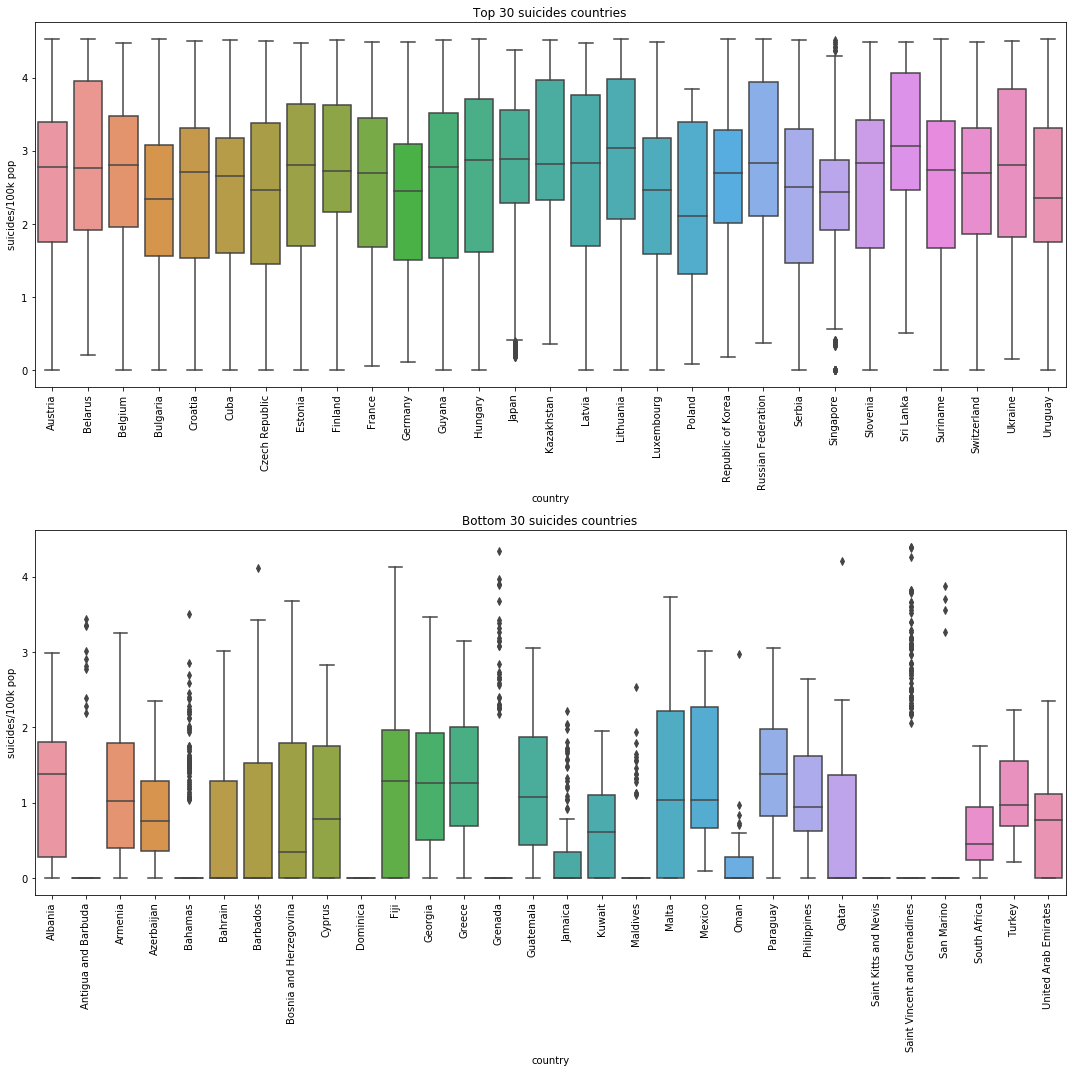

In [41]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.boxplot(x='country', y='suicides/100k pop', 
            data=suicide.loc[suicide['country'].isin(top_suicides_countries)], ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Top 30 suicides countries')
sns.boxplot(x='country', y='suicides/100k pop', 
            data=suicide.loc[suicide['country'].isin(bottom_suicides_countries)], ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Bottom 30 suicides countries')
plt.tight_layout()
plt.show()

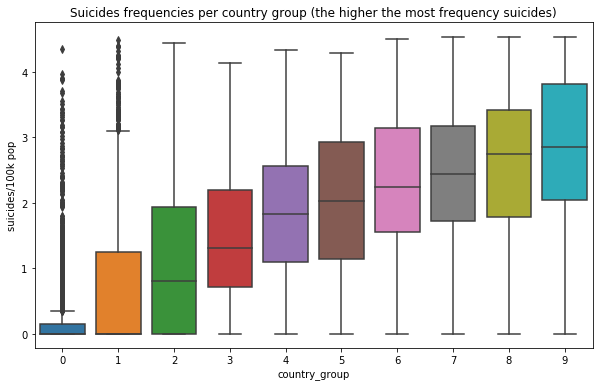

In [42]:
temp = pd.qcut(x=suicide.groupby(['country']).mean()['suicides/100k pop'].sort_values(ascending=False), 
               q=10, labels=range(10))
suicide['country_group'] = suicide['country'].map(temp)
suicide['country_group'] = pd.to_numeric(suicide['country_group'])

plt.figure(figsize=(10,6))
sns.boxplot(x=suicide['country_group'], y=suicide['suicides/100k pop'])
plt.title("Suicides frequencies per country group (the higher the most frequency suicides)")
plt.show()

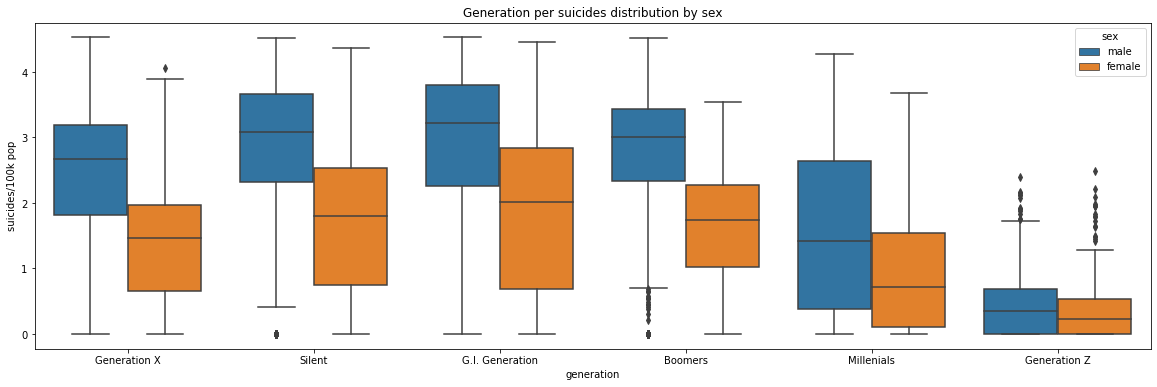

In [43]:
plt.figure(figsize=(20,6))
sns.boxplot(suicide['generation'], suicide['suicides/100k pop'], hue=suicide['sex'])
plt.title("Generation per suicides distribution by sex")
plt.show()


# Deleting the suicides number as it's not normally distributed 

In [44]:
TO_DELETE.append('suicides_no')

In [45]:
TO_DELETE.append('country-year')

In [46]:
print("COLUMNS: ", list(suicide.columns))

COLUMNS:  ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'country_group', 'year_range']


In [47]:
print("CATEGORICALS: ", CATEGORICALS)

CATEGORICALS:  ['country_group', 'year_range', 'sex', 'age']


In [48]:
print("CONTINUOUS: ", CONTINUOUS)

CONTINUOUS:  ['suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', ' gdp_for_year ($) ']


In [49]:
print("TO_DELETE: ", TO_DELETE)

TO_DELETE:  ['country', 'year', 'suicides_no', 'country-year']


In [50]:
suicide.drop(TO_DELETE,1,inplace=True)

In [51]:
df1 = suicide[CATEGORICALS]

In [52]:
df2 = suicide[CONTINUOUS]

In [53]:
df1.shape

(27382, 4)

In [54]:
df2.shape

(27382, 4)

In [55]:
join_df = df1.join(df2)

In [56]:
join_df.shape

(27382, 8)

In [57]:
join_df

,country_group,year_range,sex,age,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year ($)
0,1,"(1984.999, 1989.0]",male,15-24 years,2.042518,0.776807,6.680855,"2,156,624,900"
1,1,"(1984.999, 1989.0]",male,35-54 years,1.822935,0.776807,6.680855,"2,156,624,900"
2,1,"(1984.999, 1989.0]",female,15-24 years,1.763017,0.776807,6.680855,"2,156,624,900"
3,1,"(1984.999, 1989.0]",male,75+ years,1.720979,0.776807,6.680855,"2,156,624,900"
4,1,"(1984.999, 1989.0]",male,25-34 years,1.453953,0.776807,6.680855,"2,156,624,900"
...,...,...,...,...,...,...,...,...
27815,4,"(2012.0, 2015.0]",female,35-54 years,1.376244,0.675000,7.745003,"63,067,077,179"
27816,4,"(2012.0, 2015.0]",female,75+ years,1.275363,0.675000,7.745003,"63,067,077,179"
27817,4,"(2012.0, 2015.0]",male,5-14 years,1.153732,0.675000,7.745003,"63,067,077,179"
27818,4,"(2012.0, 2015.0]",female,5-14 years,0.982078,0.675000,7.745003,"63,067,077,179"


# Correlation Matrix

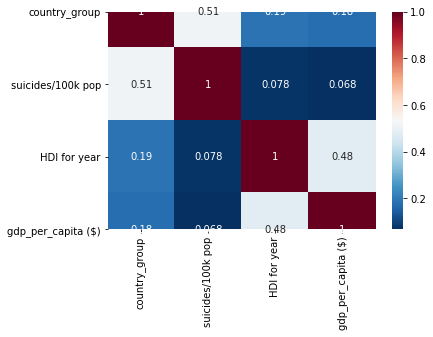

In [58]:
sns.heatmap(join_df.corr(), annot=True, cmap='RdBu_r')

# Label encoder for data transformation

In [62]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
suicide_encoded = join_df.apply(lambda x: labelEncoder.fit_transform(x.astype(str)))


In [63]:
suicide_encoded.shape

(27382, 8)

In [64]:
suicide_encoded.dtypes

country_group         int32
year_range            int32
sex                   int32
age                   int32
suicides/100k pop     int32
HDI for year          int32
gdp_per_capita ($)    int32
 gdp_for_year ($)     int32
dtype: object

In [65]:
OBJECTIVE = ['suicides/100k pop']

In [66]:
suicide[OBJECTIVE]

,suicides/100k pop
0,2.042518
1,1.822935
2,1.763017
3,1.720979
4,1.453953
...,...
27815,1.376244
27816,1.275363
27817,1.153732
27818,0.982078


In [67]:
X = suicide_encoded
y = suicide[OBJECTIVE]
X.shape, y.shape

((27382, 8), (27382, 1))

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn import metrics
import math 

In [69]:
model_1 = RandomForestRegressor(n_estimators=50, min_samples_leaf=1, max_features=None, n_jobs=-1)
model_1.fit(X,y)

C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
y_pred = model_1.predict(X)
mse_1 = metrics.mean_squared_error(y,y_pred)
print('Train Set')
print('RMSE:',math.sqrt(mse_1),'R2:',model_1.score(X,y))

Train Set
RMSE: 7.566604004750796e-05 R2: 0.9999999964648535


In [94]:
pd.DataFrame.from_dict([dict(zip(X.drop('suicides/100k pop', axis=1), model.feature_importances_))]).T.sort_values(0)

,0
HDI for year,0.014766
year_range,0.031190
gdp_for_year ($),0.060992
gdp_per_capita ($),0.072469
sex,0.190849
age,0.303276
country_group,0.326457


In [71]:
rmse_values = []
for k in range(150):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error =math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_values.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

NameError: name 'neighbors' is not defined

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
X = dataset.drop(OBJECTIVE,1).values
y = dataset[OBJECTIVE].values.ravel()
X = suicide_encoded
y = suicide[OBJECTIVE]
X.shape, y.shape

X.shape, y.shape

In [85]:
x = suicide_encoded.drop(OBJECTIVE,1).values

In [79]:
y = suicide_encoded[OBJECTIVE].values.ravel()

In [86]:
x.shape, y.shape

((27382, 7), (27382,))

In [81]:
cv = KFold(n_splits=5, shuffle=True, random_state=33)
scaler = MinMaxScaler(feature_range=(0,1))
model = RandomForestRegressor(n_jobs=4, random_state=33, n_estimators=100)

In [90]:
predictions = pd.DataFrame(columns=['true','train','test'], index=suicide_encoded.index)
predictions['true'] = np.expm1(y)
for i, (train_idx, test_idx) in enumerate(cv.split(x, y)):
    print(f"Cross-Validation iteration: {i+1}")
    x_train, y_train = x[train_idx], y[train_idx]
    x_test, y_test = x[test_idx], y[test_idx]
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    model.fit(x_train, y_train)
    
    predictions.iloc[train_idx, 1] = np.maximum(np.expm1(model.predict(x_train)), 0)
    predictions.iloc[test_idx, 2] = np.maximum(np.expm1(model.predict(x_test)), 0)

predictions = predictions.astype(np.float32)

C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in expm1
  


Cross-Validation iteration: 1


C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  


Cross-Validation iteration: 2


C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  


Cross-Validation iteration: 3


C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  


Cross-Validation iteration: 4


C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  


Cross-Validation iteration: 5


C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in expm1
  del sys.path[0]
C:\Users\tejru\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in expm1
  


C:\Users\tejru\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


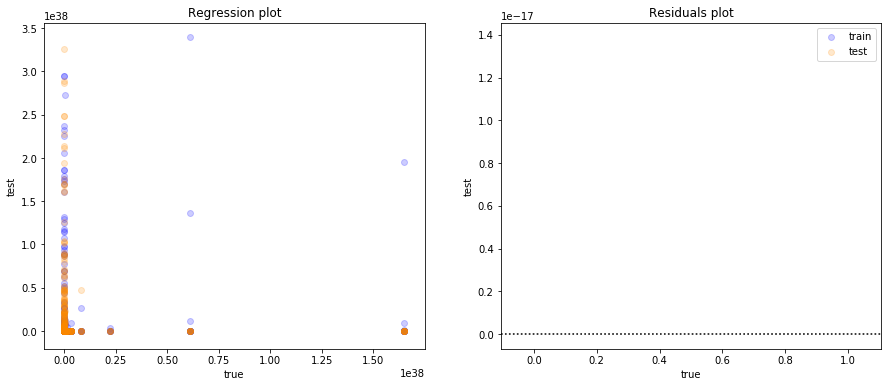

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.regplot(x=predictions['true'], y=predictions['train'], color='b', scatter_kws={'alpha':0.2}, label='train', ax=ax[0])
sns.regplot(x=predictions['true'], y=predictions['test'], color='darkorange', scatter_kws={'alpha':0.2}, label='test', ax=ax[0])
ax[0].set_title("Regression plot")
sns.residplot(x=predictions['true'], y=predictions['train'], color='b', scatter_kws={'alpha':0.2}, label='train', ax=ax[1])
sns.residplot(x=predictions['true'], y=predictions['test'], color='darkorange', scatter_kws={'alpha':0.2}, label='test', ax=ax[1])
ax[1].set_title("Residuals plot")
plt.legend()
plt.show()


In [95]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
rmse_values = []
for k in range(15):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error =math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_values.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 606.6125954365716
RMSE value for k=  2 is: 547.2637439247517
RMSE value for k=  3 is: 521.566395553996
RMSE value for k=  4 is: 515.5219619695345
RMSE value for k=  5 is: 511.19106599514294
RMSE value for k=  6 is: 514.065097584559
RMSE value for k=  7 is: 514.7406340503642
RMSE value for k=  8 is: 520.2237428080957
RMSE value for k=  9 is: 529.2558693564212
RMSE value for k=  10 is: 533.1596364916702
RMSE value for k=  11 is: 537.942848508505
RMSE value for k=  12 is: 540.6455548176357
RMSE value for k=  13 is: 545.20828443707
RMSE value for k=  14 is: 548.4128598367336
RMSE value for k=  15 is: 552.8549302336132


Text(0, 0.5, 'RMSE')

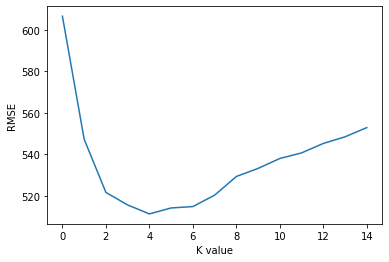

In [104]:
plt.plot(range(15),rmse_values)
plt.xlabel("K value")
plt.ylabel("RMSE")

In [105]:
predict=model.predict(x_test)

In [107]:
predict

array([253.33333333, 488.8       , 132.06666667, ..., 200.73333333,
       224.2       , 203.6       ])

In [115]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [116]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 606.6125954365716
RMSE value for k=  2 is: 547.2637439247517
RMSE value for k=  3 is: 521.566395553996
RMSE value for k=  4 is: 515.5219619695345
RMSE value for k=  5 is: 511.19106599514294
RMSE value for k=  6 is: 514.065097584559
RMSE value for k=  7 is: 514.7406340503642
RMSE value for k=  8 is: 520.2237428080957
RMSE value for k=  9 is: 529.2558693564212
RMSE value for k=  10 is: 533.1596364916702
RMSE value for k=  11 is: 537.942848508505
RMSE value for k=  12 is: 540.6455548176357
RMSE value for k=  13 is: 545.20828443707
RMSE value for k=  14 is: 548.4128598367336
RMSE value for k=  15 is: 552.8549302336132
RMSE value for k=  16 is: 556.833880471201
RMSE value for k=  17 is: 559.936176407345
RMSE value for k=  18 is: 562.7328420005296
RMSE value for k=  19 is: 565.8240465706899
RMSE value for k=  20 is: 570.1606451748087


In [111]:
from sklearn.model_selection import GridSearchCV
knn = neighbors.KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

model_1 = GridSearchCV(knn, params, cv=4)
model_1.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)